In [36]:
import json
import pickle as pkl
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pymatgen.core import Composition, Element
import pprint as pp
import re

In [2]:
with open('data/ss_precursor_nomenclature.pkl', 'rb') as f:
    ss_precursor_nomenclature = pkl.load(f)

In [3]:
file_name = 'data/only_ss_rxns_one_hot.pkl'
with open(file_name, 'rb') as f:
    full_papers = pkl.load(f)

In [4]:
len(full_papers)

31042

In [5]:
ss_targets = [x['target'] for x in full_papers]

In [6]:
pd.Series(ss_targets).value_counts().head(20)

BaTiO3                    148
LiFePO4                   129
SrTiO3                    127
LiMn2O4                   116
CaTi4Cu3O12               116
FeBiO3                    106
Li4Ti5O12                  91
Y3Al5O12                   79
K0.5Na0.5NbO3              76
Na0.5TiBi0.5O3             59
Sr0.1Mg0.2La0.9Ga0.8O3     57
CaTiO3                     53
Ba2YCu3O7                  52
BaFe12O19                  51
Li7La3Zr2O12               51
LiMn1.5Ni0.5O4             47
LiCoO2                     45
Fe2NiO4                    43
Ca3Co4O9                   43
Fe2CoO4                    43
dtype: int64

In [7]:
unique_ss_targets = list(set(ss_targets))
ct = 0
for target in unique_ss_targets:
    nums = Composition(target).get_el_amt_dict().values()
    if all(x.is_integer() for x in nums):
        ct += 1
print(ct/len(unique_ss_targets))

0.18738496741779834


In [8]:
# change precursors back
for rxn in full_papers:
    for i in range(len(rxn['precursors'])):
        rxn['precursors'][i] = ss_precursor_nomenclature[Composition(rxn['precursors'][i]).reduced_composition]

In [9]:
# calcination
all_els_precs = []
all_elements = [Element.from_Z(i).symbol for i in range(1, 119)]
index = 0
for el in all_elements:
    new_dict = {}
    new_dict["Element"] = el
    new_dict["Precursors"] = {}
    for rxn in full_papers:
        temp_time = rxn['temp_time_vector']
        if temp_time[index] <= 0:
            continue
        for prec in rxn['precursors']:
            prec_comp = Composition(prec)
            prec_els = list([el for el in prec_comp.get_el_amt_dict().keys() if el not in ['C', 'H', 'O']])
            if el in prec_els:
                if prec not in new_dict["Precursors"]:
                    new_dict["Precursors"][prec] = []
                new_dict["Precursors"][prec].append(temp_time[index])
    all_els_precs.append(new_dict)

In [10]:
# sintering
all_els_precs_2 = []
index = 1
for el in all_elements:
    new_dict = {}
    new_dict["Element"] = el
    new_dict["Precursors"] = {}
    for rxn in full_papers:
        temp_time = rxn['temp_time_vector']
        if temp_time[index] <= 0:
            continue
        for prec in rxn['precursors']:
            prec_comp = Composition(prec)
            prec_els = list([el for el in prec_comp.get_el_amt_dict().keys() if el not in ['C', 'H', 'O']])
            if el in prec_els:
                if prec not in new_dict["Precursors"]:
                    new_dict["Precursors"][prec] = []
                new_dict["Precursors"][prec].append(temp_time[index])
    all_els_precs_2.append(new_dict)

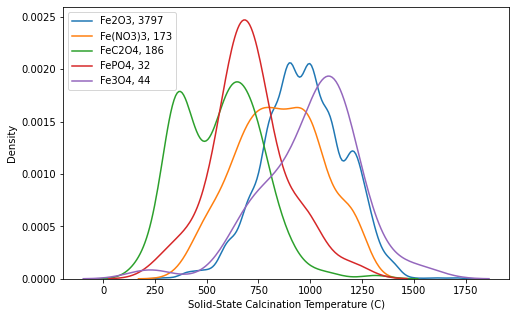

In [11]:
for el in all_els_precs:
    if el['Element'] == 'Fe':
        plt.rcParams["figure.figsize"] = [8,5]
        fig, ax = plt.subplots()
        ax.set_xlabel("Solid-State Calcination Temperature (C)")
        labels = []
        for prec in el['Precursors']:
            #if len(el['Precursors'][prec]) > 30:
            if prec in ["Fe2O3", "Fe3O4", "FeC2O4", "Fe(NO3)3", "FePO4"]:
                labels.append("{}, {}".format(prec, len(el['Precursors'][prec])))
                sns.kdeplot(el['Precursors'][prec])
        ax.legend(labels, loc="upper left")

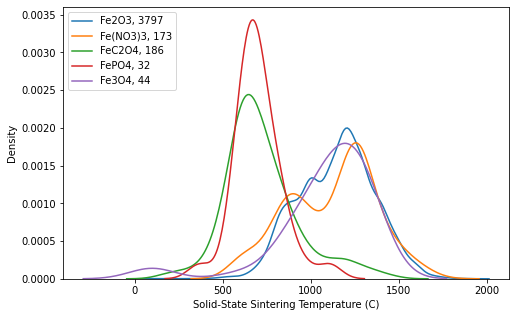

In [16]:
for el in all_els_precs_2:
    if el['Element'] == 'Fe':
        plt.rcParams["figure.figsize"] = [8,5]
        fig, ax = plt.subplots()
        ax.set_xlabel("Solid-State Sintering Temperature (C)")
        labels = []
        for prec in el['Precursors']:
            #if len(el['Precursors'][prec]) > 10:
            if prec in ["Fe2O3", "Fe3O4", "FeC2O4", "Fe(NO3)3", "FePO4"]:
                labels.append("{}, {}".format(prec, len(el['Precursors'][prec])))
                sns.kdeplot(el['Precursors'][prec])
        ax.legend(labels, loc="upper left")

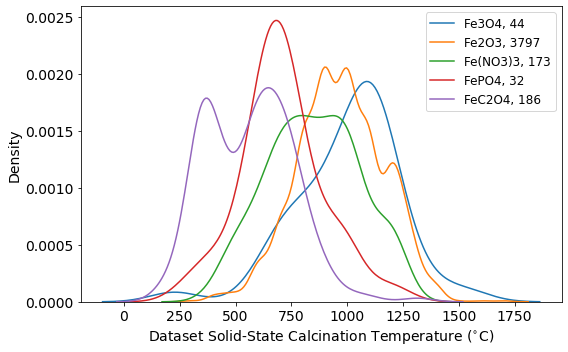

In [13]:
# plotting results
to_search = ["Fe3O4", "Fe2O3", "Fe(NO3)3", "FePO4", "FeC2O4"]
for el in all_els_precs:
    if el['Element'] == 'Fe':
        plt.rcParams["figure.figsize"] = [8,5]
        fig, ax = plt.subplots()
        ax.set_xlabel("Dataset Solid-State Calcination Temperature ($^{\circ}$C)", fontsize=14)
        labels = []
        for i in range(len(to_search)):
            for prec in el['Precursors']:
                #if len(el['Precursors'][prec]) > 30:
                if prec == to_search[i]:
                    labels.append("{}, {}".format(prec, len(el['Precursors'][prec])))
                    sns.kdeplot(el['Precursors'][prec])
ax.legend(labels, loc="upper right", fontsize=12)
ax.set_ylabel("Density", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
fig.tight_layout()
# fig.savefig('figures/ss_precursor_calcine_trends.png', dpi=200)

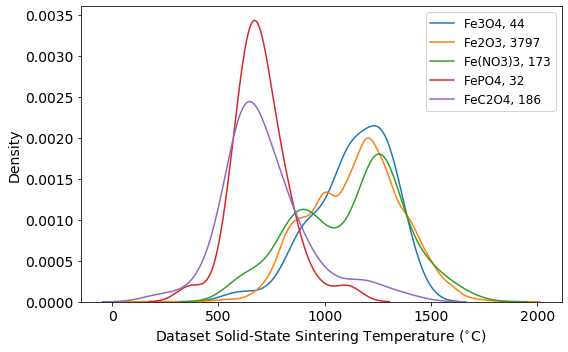

In [32]:
# plot sintering temps
to_search = ["Fe3O4", "Fe2O3", "Fe(NO3)3", "FePO4", "FeC2O4"]
for el in all_els_precs_2:
    if el['Element'] == 'Fe':
        plt.rcParams["figure.figsize"] = [8,5]
        fig, ax = plt.subplots()
        ax.set_xlabel("Dataset Solid-State Sintering Temperature ($^{\circ}$C)", fontsize=14)
        labels = []
        for i in range(len(to_search)):
            for prec in el['Precursors']:
                #if len(el['Precursors'][prec]) > 30:
                if prec == to_search[i]:
                    labels.append("{}, {}".format(prec, len(el['Precursors'][prec])))
                    sns.kdeplot([x for x in el['Precursors'][prec] if x > 100], cut=3)
ax.legend(labels, loc="upper right", fontsize=12)
ax.set_ylabel("Density", fontsize=14)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
fig.tight_layout()
# fig.savefig('figures/ss_precursor_sinter_trends.png', dpi=200)

In [34]:
def clean_formula(formula):
    formula = re.sub("([0-9]+(\.[0-9]+)?)", "_{\\1}", formula)
    formula = '$\mathregular{'+formula+'}$'
    return formula

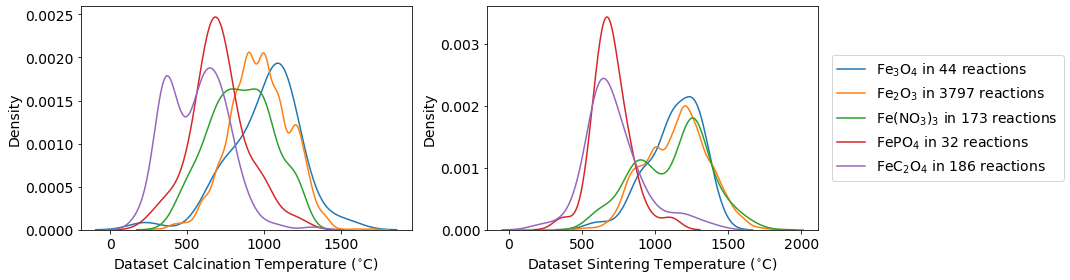

In [45]:
fig, ax = plt.subplots(1, 2, figsize=(15, 4))
ax[0].set_xlabel("Dataset Calcination Temperature ($^{\circ}$C)", fontsize=14)
ax[1].set_xlabel("Dataset Sintering Temperature ($^{\circ}$C)", fontsize=14)
to_search = ["Fe3O4", "Fe2O3", "Fe(NO3)3", "FePO4", "FeC2O4"]
for el in all_els_precs:
    if el['Element'] == 'Fe':
        labels = []
        for i in range(len(to_search)):
            for prec in el['Precursors']:
                #if len(el['Precursors'][prec]) > 30:
                if prec == to_search[i]:
                    labels.append("{} in {} reactions".format(clean_formula(prec), len(el['Precursors'][prec])))
                    sns.kdeplot(el['Precursors'][prec], ax=ax[0])
                    
for el in all_els_precs_2:
    if el['Element'] == 'Fe':
        for i in range(len(to_search)):
            for prec in el['Precursors']:
                if prec == to_search[i]:
                    sns.kdeplot([x for x in el['Precursors'][prec] if x > 100], ax=ax[1], cut=3)
                    
ax[0].set_ylabel("Density", fontsize=14)
ax[1].set_ylabel("Density", fontsize=14)
ax[0].tick_params(axis='x', labelsize=14)
ax[1].tick_params(axis='x', labelsize=14)
ax[0].tick_params(axis='y', labelsize=14)
ax[1].tick_params(axis='y', labelsize=14)
ax[1].legend(labels, bbox_to_anchor=(1.04,0.5), loc="center left", borderaxespad=0, fontsize=14)
fig.tight_layout()
fig.savefig('figures/fe_precursor_trends_combined.png', dpi=150)

# look at MPs

In [20]:
with open('/home/jupyter/CJK/TempTime/rxn_classification_fraction/data/full_mp.json', 'r') as f:
    full_mp = json.load(f)

full_mp = {Composition(x): full_mp[x] for x in full_mp}

In [21]:
for prec in to_search:
    print(prec, full_mp[Composition(prec)])

Fe3O4 1597.0
Fe2O3 1539.0
Fe(NO3)3 35.0
FePO4 250.0
FeC2O4 150.0


In [14]:
all_comps_precs_temps = []
for target in set(ss_targets):
    for rxn in full_papers:
        temps = rxn['temp_time_vector'][:4]
        times = rxn['temp_time_vector'][4:]
        if rxn['target'] == target:
            found = False
            for entry in all_comps_precs_temps:
                if entry['Target'] == target and set(entry['Materials']) == set(rxn['precursors']):
                    found = True
                    if temps[0] > 0:
                        entry['Calcine_temps'].append(temps[0])
                    if temps[1] > 0:
                        entry['Sinter_temps'].append(temps[1])
            if not found and (temps[0] > 0 or temps[1] > 0):
                new_entry = {}
                new_entry['Target'] = target
                new_entry['Materials'] = rxn['precursors']
                new_entry['Calcine_temps'] = []
                new_entry['Sinter_temps'] = []
                if temps[0] > 0:
                    new_entry['Calcine_temps'].append(temps[0])
                if temps[1] > 0:
                    new_entry['Sinter_temps'].append(temps[1])
                all_comps_precs_temps.append(new_entry)

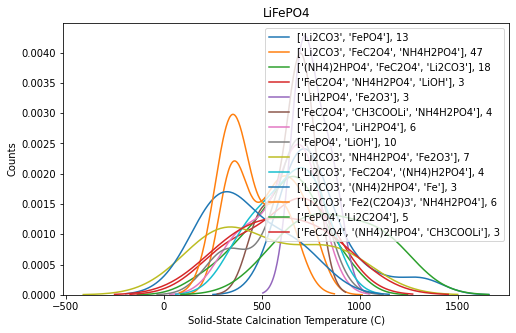

In [16]:
target = "LiFePO4"
labels = []
plt.rcParams["figure.figsize"] = [8,5]
fig, ax = plt.subplots()
ax.set_xlabel("Solid-State Calcination Temperature (C)")
ax.set_ylabel("Counts")
ax.set_title(target)
bins = np.linspace(200, 1200, 30)
for entry in all_comps_precs_temps:
    if entry['Target'] == target and len(entry['Calcine_temps']) > 2:
        labels.append("{}, {}".format(entry['Materials'], len(entry['Calcine_temps'])))
        sns.kdeplot(entry['Calcine_temps'])
        #plt.hist(entry['Calcine_temps'], bins=bins, alpha=0.3)
ax.legend(labels, loc="upper right")

In [31]:
unique_comps = []
for target in unique_ss_targets:
    target_els = set([el for el in Composition(target).get_el_amt_dict().keys() if el not in ["O", "H"]])
    if target_els not in unique_comps:
        unique_comps.append(target_els)

In [32]:
for comp in unique_comps:
    if 'Li' in comp and 'Mn' in comp:
        print(comp)

{'Ni', 'Li', 'Co', 'Mn', 'P'}
{'Li', 'Mn', 'B'}
{'Li', 'Mn', 'Al'}
{'Li', 'Mn', 'P', 'Co'}
{'Cu', 'Li', 'Mn'}
{'Li', 'Mn', 'Sn'}
{'Li', 'Mn', 'Ti'}
{'Fe', 'Li', 'Mn', 'Ni'}
{'Ni', 'Li', 'Mn', 'Co'}
{'Fe', 'Li', 'Mn', 'V'}
{'Ta', 'Li', 'Mn'}
{'Li', 'Mn'}
{'Ni', 'Li', 'Mn', 'Cr'}
{'Ru', 'Li', 'Mn'}
{'Ni', 'Li', 'Mn'}
{'Fe', 'Li', 'Mn', 'Mg'}
{'Fe', 'Li', 'Mn'}
{'Y', 'Li', 'Mn'}
{'Li', 'Mn', 'Co'}
{'Ni', 'Li', 'Co', 'Mo', 'Mn'}
{'Ni', 'Li', 'Mn', 'Ti'}
{'Ni', 'Li', 'Mn', 'Al'}
{'Li', 'Mn', 'Cl'}
{'Li', 'Mn', 'P', 'B'}
{'Fe', 'Li', 'Mn', 'Na'}
{'Li', 'Mn', 'Cr'}
{'Li', 'Mn', 'Nb'}
{'Li', 'Fe', 'Mg', 'Mn', 'P'}
{'Li', 'Zn', 'Fe', 'Ti', 'Mn'}
{'Mo', 'Li', 'Mn', 'Ni'}
{'La', 'Li', 'Mn', 'Rh'}
{'La', 'Li', 'Mn', 'Sb'}
{'Sr', 'Li', 'Mn'}
{'Zr', 'Li', 'Mn'}
{'Ni', 'Li', 'Al', 'Co', 'Mn'}
{'Li', 'Mn', 'Br'}
{'Ni', 'Li', 'Mn', 'Si'}
{'Ca', 'Li', 'Mn', 'La'}
{'Fe', 'Li', 'Mn', 'P'}
{'Li', 'Mn', 'F', 'Co'}
{'Li', 'Mn', 'Na'}
{'Li', 'Mn', 'Mg'}
{'S', 'Li', 'Mn'}
{'Mn', 'Li', 'Ti', 'Mg'}
{'Fe', 'Li', 

In [34]:
desired_els = ["Li", "Mn"]
for entry in all_comps_precs_temps:
    target_els = Composition(entry['Target']).get_el_amt_dict().keys()
    if set(desired_els).issubset(set(target_els)):
        print(entry['Target'])

LiMn0.333Co0.333Ni0.333PO4
LiMnBO3
LiMnBO3
LiMnBO3
LiMnBO3
LiMn1.95Al0.05O4
LiMn0.1Co0.9PO4
LiMn1.8Cu0.2O4
Li2MnSn3O8
LiMn1.96Al0.04O4
Li4Ti4.9Mn0.1O12
LiMn1.5Fe0.2Ni0.3O4
Li1.2Mn0.54Co0.13Ni0.13O2
Li1.2Mn0.54Co0.13Ni0.13O2
Li1.2Mn0.54Co0.13Ni0.13O2
LiVMn0.5Fe0.5O4
LiTaMnO4
Li1.12Mn1.88O4
Li1.2Cr0.04Mn0.58Ni0.18O2
LiMn0.333CoNi0.333O2
Li2Mn0.4Ru0.6O3
Li1.2Mn0.6O2
LiMn1.8Ni0.2O4
Li0.25Mg0.5Mn0.1Fe2.15O4
LiMn1.9Fe0.1O4
Li1.02Y0.02Mn1.98O4
Li1.1Mn2O4
LiMn1.833Co0.167O4
Li6Mn12O24
LiMn1.5Ni0.5O4
LiMn1.5Ni0.5O4
LiMn1.5Ni0.5O4
LiMn1.5Ni0.5O4
LiMn1.5Ni0.5O4
LiMn1.5Ni0.5O4
LiMn1.5Ni0.5O4
LiMn1.5Ni0.5O4
LiMn1.5Ni0.5O4
LiMn1.5Ni0.5O4
LiMn1.5Ni0.5O4
LiMn1.5Ni0.5O4
LiMn1.5Ni0.5O4
LiMn1.5Ni0.5O4
LiMn1.5Ni0.5O4
LiMn1.5Ni0.5O4
LiMn1.5Ni0.5O4
LiMn1.5Ni0.5O4
LiMn1.5Ni0.5O4
LiMn1.5Ni0.5O4
LiMn1.5Ni0.5O4
LiMn1.5Ni0.5O4
LiMn1.5Ni0.5O4
LiMn1.95Fe0.05O4
LiMo0.04Mn0.06Co0.1Ni0.8O2
Li1.5Mn0.75Ni0.25O2.5
Li1.05Ti0.5MnNi0.5O4
LiMn2O4
LiMn2O4
LiMn2O4
LiMn2O4
LiMn2O4
LiMn2O4
LiMn2O4
LiMn2O4
LiMn2O4
LiMn2O4
LiMn2O

In [31]:
for paper in full_papers:
    if paper['target'] == "Li4Fe7O12":
        print(paper['precursors'])